<a href="https://colab.research.google.com/github/elinteerie/Models/blob/main/Transfer_Learning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Transfer Learning: Fine Tuning 

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!wget https://raw.githubusercontent.com/elinteerie/helper/main/helper_function.py

--2022-06-23 16:12:10--  https://raw.githubusercontent.com/elinteerie/helper/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12697 (12K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]  12.40K  --.-KB/s    in 0s      

2022-06-23 16:12:11 (46.9 MB/s) - ‘helper_function.py’ saved [12697/12697]



In [3]:
from helper_function import create_model, create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, view_argumented

In [4]:
from helper_function import create_model_checkpoint

In [5]:
#Get 10 percent data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-06-23 16:12:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  42.5MB/s    in 3.8s    

2022-06-23 16:12:19 (42.5 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
unzip_data('/content/10_food_classes_10_percent.zip')

In [7]:
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_perc

In [8]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32


In [9]:
data_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [10]:

import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) 



test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [11]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

Building model_0

In [12]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze layers
base_model.trainable=False

#Create inputs

inputs = tf.keras.layers.Input(shape =(224,224,3), name ='input_layer')


x = base_model(inputs)

#Averagepool

x = tf.keras.layers.GlobalAveragePooling2D(name='average_layer')(x)

#Create output

outputs = tf.keras.layers.Dense(10, activation ='softmax', name ='output')(x)

model_0 = tf.keras.Model(inputs, outputs)


model_0.compile(loss ='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'] )
history = model_0.fit(train_data, epochs = 5, 
                      steps_per_epoch =len(train_data),
                      validation_data=test_data, callbacks = [create_tensorboard_callback('finetuning', 'model_0')])



16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: finetuning/model_0/20220623-161224
Epoch 1/5
24/24 [==============================] - 169s 7s/step - loss: 1.8990 - accuracy: 0.4107 - val_loss: 1.3488 - val_accuracy: 0.7132
Epoch 2/5
24/24 [==============================] - 178s 8s/step - loss: 1.1416 - accuracy: 0.7347 - val_loss: 0.9232 - val_accuracy: 0.7920
Epoch 3/5
24/24 [==============================] - 178s 8s/step - loss: 0.8326 - accuracy: 0.8040 - val_loss: 0.7541 - val_accuracy: 0.8192
Epoch 4/5
24/24 [==============================] - 160s 7s/step - loss: 0.6862 - accuracy: 0.8427 - val_loss: 0.6653 - val_accuracy: 0.8324
Epoch 5/5
24/24 [==============================] - 178s 8s/step - loss: 0.5923 - accuracy: 0.8613 - val_loss: 0.6092 - val_accuracy: 0.8396


In [13]:
model_0.evaluate(test_data)

79/79 [==============================] - 124s 2s/step - loss: 0.6092 - accuracy: 0.8396


[0.60915207862854, 0.8396000266075134]

In [ ]:
#Check layers
for layers_number, layer in enumerate(base_model.layers):
  print(layers_number, layer.name)

In [15]:
#Summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [16]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 average_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 output (Dense)              (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


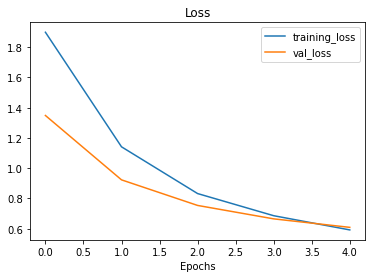

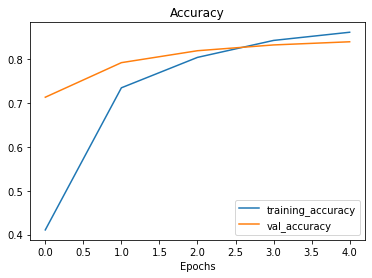

In [17]:
#Plot loss curve
plot_loss_curves(history)

In [18]:
#Getting a Feature Vector from trained model
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)


In [19]:
input_tensor

<tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
array([[[[ 0.3274685 , -0.8426258 ,  0.3194337 ],
         [-1.4075519 , -2.3880599 , -1.0392479 ],
         [-0.5573232 ,  0.539707  ,  1.6994323 ],
         [ 0.28893656, -1.5066116 , -0.26454744]],

        [[-0.59722406, -1.9171132 , -0.62044144],
         [ 0.8504023 , -0.40604794, -3.0258412 ],
         [ 0.9058464 ,  0.29855987, -0.22561555],
         [-0.7616443 , -1.891714  , -0.9384712 ]],

        [[ 0.77852213, -0.47338897,  0.97772694],
         [ 0.24694404,  0.20573747, -0.5256233 ],
         [ 0.32410017,  0.02545409, -0.10638497],
         [-0.6369475 ,  1.1603122 ,  0.2507359 ]],

        [[-0.41728497,  0.40125778, -1.4145442 ],
         [-0.59318566, -1.6617213 ,  0.33567193],
         [ 0.10815629,  0.2347968 , -0.56668764],
         [-0.35819843,  0.88698626,  0.5274477 ]]]], dtype=float32)>

In [20]:
xy = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

In [21]:
xy

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [22]:
x =tf.keras.layers.GlobalMaxPooling2D()(input_tensor)

In [23]:
x

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [24]:
#1% of Training Data


!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-06-23 16:31:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  71.4MB/s    in 1.8s    

2022-06-23 16:31:47 (71.4 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [25]:
unzip_data('10_food_classes_1_percent.zip')

In [26]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/gr

In [27]:
per_test = '/content/10_food_classes_1_percent/test'
per_train = '/content/10_food_classes_1_percent/train'

percent_train = tf.keras.preprocessing.image_dataset_from_directory(directory=per_train,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32)

percent_test = tf.keras.preprocessing.image_dataset_from_directory(directory=per_test,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [28]:
IMG_SIZE

(224, 224)

In [29]:
 #Adding Data Argument
 from tensorflow import keras
 from tensorflow.keras import layers


data_augmentation = tf.keras.Sequential([                                       
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.Resizing(224,224)])

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import os
import random
def view_argumented(target_clas, target_dir):

  '''
  target class should be the training data +.class_name and then the target_dir should be the directory of the training data

  '''
  target_class = random.choice(percent_train.class_names)
  target_dir ='/content/10_food_classes_1_percent/train/' + target_class
  random_image = random.choice(os.listdir(target_dir))
  random_image_path = target_dir + '/' +random_image
  #Read in 
  img = mping.imread(random_image_path)
  fin = plt.imshow(img)
  plt.title(f'Orginal Target Image from class {target_class} ')
  plt.axis(False)


#Plot Argumented
  augmented_img = data_augmentation(img, training =True)
  plt.figure()
  fin2 = plt.imshow(augmented_img/255.)
  plt.title(f'AugumentedImage')
  return fin, fin2



(<matplotlib.image.AxesImage at 0x7f8d0ff02bd0>,
 <matplotlib.image.AxesImage at 0x7f8d100defd0>)

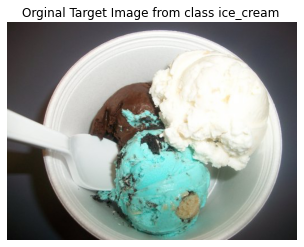

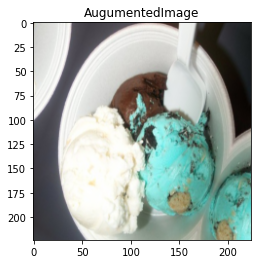

In [31]:
view_argumented(percent_train.class_names, '/content/10_food_classes_1_percent/train/' )

(-0.5, 223.5, 223.5, -0.5)

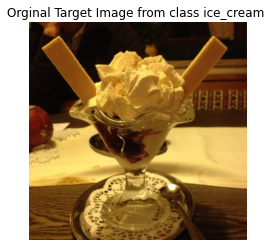

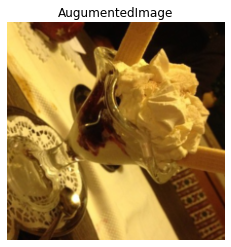

In [32]:
### Visualize Argumented Data
import matplotlib.pyplot as plt
import matplotlib.image as mping
import os
import random

target_class = random.choice(percent_train.class_names)
target_dir ='/content/10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' +random_image
#Read in 
img = mping.imread(random_image_path)
plt.imshow(img)
plt.title(f'Orginal Target Image from class {target_class} ')
plt.axis(False)


#Plot Argumented
augmented_img = data_augmentation(img, training =True)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f'AugumentedImage')
plt.axis(False)


###Model1 with 1 percent Data

In [33]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(percent_train,
                    epochs=5,
                    steps_per_epoch=len(percent_train),
                    validation_data=percent_test,
                    validation_steps=int(0.25* len(percent_test)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("finetuning", "1_percent_data_aug")])

Saving TensorBoard log files to: finetuning/1_percent_data_aug/20220623-163153
Epoch 1/5
3/3 [==============================] - 53s 22s/step - loss: 2.3955 - accuracy: 0.0857 - val_loss: 2.2616 - val_accuracy: 0.1579
Epoch 2/5
3/3 [==============================] - 45s 22s/step - loss: 2.1754 - accuracy: 0.2429 - val_loss: 2.1535 - val_accuracy: 0.2352
Epoch 3/5
3/3 [==============================] - 45s 22s/step - loss: 1.9963 - accuracy: 0.4143 - val_loss: 2.0344 - val_accuracy: 0.3191
Epoch 4/5
3/3 [==============================] - 34s 16s/step - loss: 1.9015 - accuracy: 0.4286 - val_loss: 1.9585 - val_accuracy: 0.3503
Epoch 5/5
3/3 [==============================] - 45s 22s/step - loss: 1.7291 - accuracy: 0.5571 - val_loss: 1.8869 - val_accuracy: 0.3898


In [ ]:
model_1.summary()

In [ ]:
model_1.evaluate(percent_test)

In [ ]:
plot_loss_curves(history_1_percent
                 )

###Building Model 2

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

In [ ]:
data_dir ='/content/10_food_classes_10_percent.zip'

In [ ]:
unzip_data(data_dir)

In [ ]:
walk_through_dir('/content/10_food_classes_10_percent')

In [ ]:
ten_train ='/content/10_food_classes_10_percent/train'
ten_test ='/content/10_food_classes_10_percent/test'

In [ ]:
IMG_SIZE = (224,224)

In [ ]:
ten_percent_test

In [ ]:
ten_percent_train = tf.keras.preprocessing.image_dataset_from_directory(directory=ten_train,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32)

ten_percent_test = tf.keras.preprocessing.image_dataset_from_directory(directory=ten_test,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32)

###Building ModelCheckpoint

In [ ]:
#Functionalise Model Checkpoint
import datetime

def create_model_checkpoint(file_name):
  '''
  Create Model Checkpoint Callback for any Model You are building

  Args:
  file_name: File_name will be the directory name which will have a timestamp to it.
  '''

  filepathdir = file_name + '/' +datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  filepath = filepathdir + '.ckpt'
  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath =filepath,
                                                         save_weight_only =True,
                                                         save_best_only=False,
                                                         save_freq ='epoch',
                                                         verbose =1)
  return checkpoint_callback


In [ ]:
create_model_checkpoint('model_2')

In [ ]:
#Set checkpoing path

checkpoint_path = 'ten_percent/checkpoint.ckpt'

#Create the checkpoint
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath =checkpoint_path,
                                                         save_weight_only =True,
                                                         save_best_only=False,
                                                         save_freq ='epoch',
                                                         verbose =1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
input_shape = (224,224,3)


base_thin = tf.keras.applications.EfficientNetB0(include_top=False)

base_thin.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
#x = data_augmentation(inputs)

x = base_thin(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = keras.Model(inputs, outputs)


# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_10_percent = model_2.fit(ten_percent_train,epochs=5,
                    steps_per_epoch=len(ten_percent_train),
                    validation_data=ten_percent_test,
                    validation_steps=int(len(ten_percent_test)), # validate for less steps
                    callbacks=[create_tensorboard_callback("finetuning", "ten_percent_test"), create_model_checkpoint('model_2')])



In [ ]:
model_2.layers

In [ ]:
model_2.evaluate(ten_percent_test)

In [ ]:
for alllayers in model_2.layers:
  print(alllayers, alllayers.trainable)

In [ ]:
model_2.load_weights('/content/model_2/20220622-215632.ckpt')

### Main FineTuning 

In [ ]:
model_2.load_weights('/content/model_2/20220622-223523.ckpt')

In [ ]:
for alllayers in model_2.layers:
  print(alllayers, alllayers.trainable)
  

In [ ]:
for i, layer in enumerate(model_2.layers[1].layers):
  print(i, layer.name, layer.trainable)


In [ ]:
#last ten layers to true
base_thin.trainable = True

#Freeze all in layers except last ten

for layer in base_thin.layers[:-10]:
  layer.trainable = False


In [ ]:
for layer in base_thin.layers[:-10]:
  print(layer.name)

In [ ]:
model_2.compile(loss ='categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ['accuracy'])

In [ ]:
for layers_number, layer in enumerate(model_2.layers[1].layers):
  print(layers_number, layer.name, layer.trainable)

In [ ]:
print(len(model_2.trainable_variables))

In [ ]:
initial_epochs = 5

In [74]:
fine_tune_epochs = initial_epochs + 5

hstory_fine = model_2.fit(ten_percent_train,epochs=fine_tune_epochs,
                    steps_per_epoch=len(ten_percent_train),
                    validation_data=ten_percent_test,
                    validation_steps=int(0.25 * len(ten_percent_test)), 
                    initial_epoch = history_10_percent.epoch[-1],callbacks=[create_tensorboard_callback("finetuning", "ten_percent_test"), create_model_checkpoint('model_2_neew')])

Saving TensorBoard log files to: finetuning/ten_percent_test/20220623-000752
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.6213 - accuracy: 0.8320
Epoch 5: saving model to model_2_neew/20220623-000752.ckpt
INFO:tensorflow:Assets written to: model_2_neew/20220623-000752.ckpt/assets
24/24 [==============================] - 157s 6s/step - loss: 0.6213 - accuracy: 0.8320 - val_loss: 0.4937 - val_accuracy: 0.8651
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.4892 - accuracy: 0.8747
Epoch 6: saving model to model_2_neew/20220623-000752.ckpt
INFO:tensorflow:Assets written to: model_2_neew/20220623-000752.ckpt/assets
24/24 [==============================] - 134s 6s/step - loss: 0.4892 - accuracy: 0.8747 - val_loss: 0.4824 - val_accuracy: 0.8618
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.4124 - accuracy: 0.9093
Epoch 7: saving model to model_2_neew/20220623-000752.ckpt
INFO:tensorflow:Assets written to: model_2_neew/2022